In [46]:
import pandas as pd
movies = pd.read_csv("fandango_score_comparison.csv")
movies.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


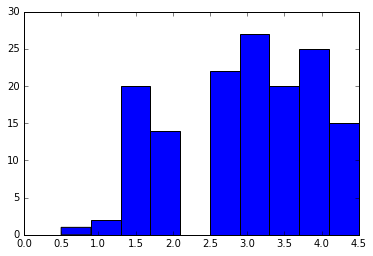

In [47]:
# Metacritic rates
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(movies['Metacritic_norm_round'])
plt.show()

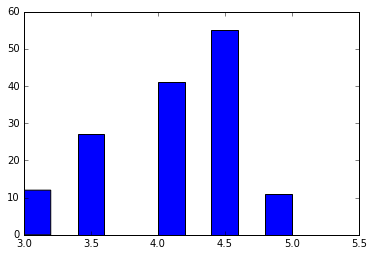

In [48]:
# Fandango rates
plt.hist(movies['Fandango_Stars'])
plt.show()

In [49]:
# check mean, median and standard deviation of both of them
import numpy as np
fandango_mean = np.mean(movies['Fandango_Stars'])
metacritic_mean = np.mean(movies['Metacritic_norm_round'])
fandango_median = np.median(movies['Fandango_Stars'])
metacritic_median = np.median(movies['Metacritic_norm_round'])
fandango_std = np.std(movies['Fandango_Stars'])
metacritic_std = np.std(movies['Metacritic_norm_round'])
print('F - mean: ' + str(fandango_mean))
print('M - mean: ' + str(metacritic_mean))
print()
print('F - median: ' + str(fandango_median))
print('M - median: ' + str(metacritic_median))
print()
print('F - std: ' + str(fandango_std))
print('M - std: ' + str(metacritic_std))

F - mean: 4.08904109589
M - mean: 2.97260273973

F - median: 4.0
M - median: 3.0

F - std: 0.53853216127
M - std: 0.987561029704


In [50]:
# Rates from Fandango are much higher than rates from Metacritic.
# A little more than one point for mean and median, specifically.
# This reflect also on standard deviation, 
# with values that have less space to variate.

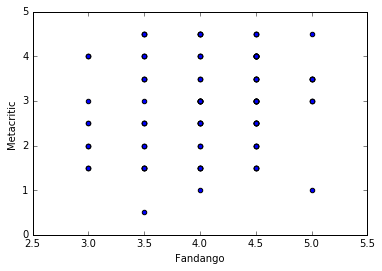

In [51]:
# draw a scatter plot with Metacritic and Fandango rates
plt.scatter(movies['Fandango_Stars'], movies['Metacritic_norm_round'])
plt.xlabel('Fandango')
plt.ylabel('Metacritic')
plt.show()

In [52]:
# add a column to movies, named fm_diff where we put
# the absolute value of the differences between the two rates
movies['fm_diff'] = np.absolute(movies['Metacritic_norm_round'] - movies['Fandango_Stars'])
movies = movies.sort_values(['fm_diff'], ascending = [False])
# show the 5 rows with the biggest difference
movies.head()
# the movie titles "Do you believe?" got 
# 1/5 from Metacritic and 5/5 from Fandango
# it's the highest difference in our dataset

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


In [53]:
# From scipy.stats we could import pearsonr, but we choose to import
# lenregress

In [54]:
from scipy.stats import linregress
a = movies['Metacritic_norm_round']
b = movies['Fandango_Stars']
# calculate slope, intercept, r, p, and standard deviation
# of the two vectors of rates from Metacritic and Fandango
slope, intercept, r, p, std = linregress(a, b)
pred_3 = (3 * slope) + intercept
print('M[3]: ' + str(pred_3))

M[3]: 4.09170715282


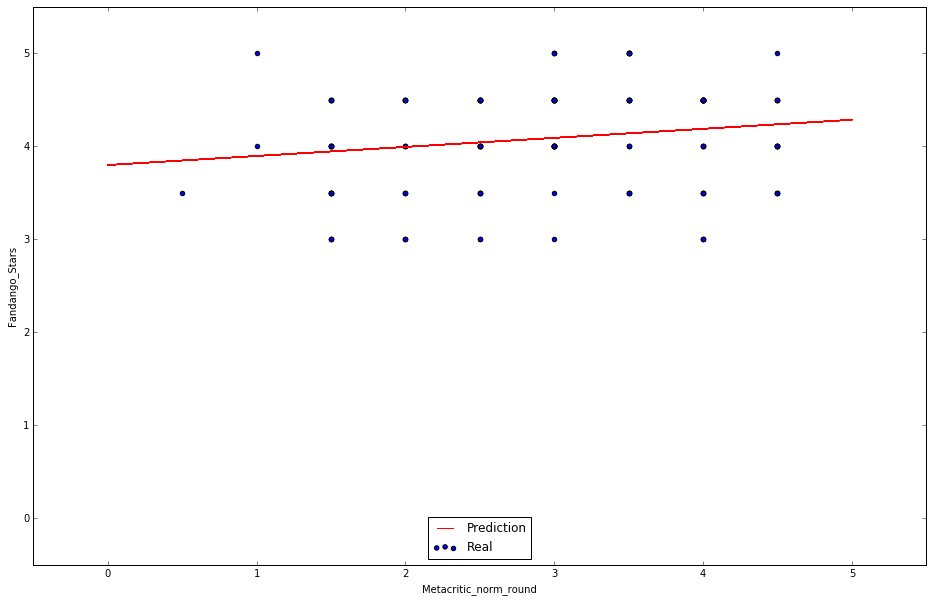

In [55]:
import random
# plant the seed
random.seed(1)
# pick 100 random numbers --> random_100_x
random_100 = [random.randint(0, 5) for _ in range(100)]
random_100_x = np.array(random_100)
# generate y, basing on x, slope and intercept
random_100_y = random_100_x * slope + intercept
# create the space for the plot --> fig, ax
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111)
# the line with the predictions comes from random_100_x, random_100_y
ax.plot(random_100_x, random_100_y, c='r', label='Prediction')
# the scatterplot comes from the actual data
ax.scatter(movies['Metacritic_norm_round'], movies['Fandango_Stars'], c='b', label='Real')
# add legend, labels, and limit the range of the axes
plt.legend(loc='lower center');
plt.xlabel('Metacritic_norm_round')
plt.ylabel('Fandango_Stars')
ax.set_xlim([-0.5, 5.5])
ax.set_ylim([-0.5, 5.5])
plt.show()